# Demonstrate Statcasting

A notebook of a few ways to use the Statcast pitching tools.

In [1]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from random import randrange
import scipy.stats as sst

# ipython reload capabilities for edits to external code
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import pandas as pd



In [2]:
# start by selecting your year of interest
year = '2020'

# todo: add cross-year slices

In [3]:
# pull in the codes for statcast queries

PlayerDict = dict()
f = open('data/playerdict'+year+'.txt')

line = f.readline()
while line:
    PlayerDict[line.split(',')[0].strip()] = line.split(',')[1].strip()
    line = f.readline()

f.close()
print(PlayerDict['Jose Berrios'])

621244


In [139]:


check_players = ['Shane Bieber','Jose Berrios','Zack Greinke','Gerrit Cole','James Paxton']

#check_players = list(PlayerDict.keys())[1:100]
save = True

verbose=False
#BPDict = {}
year = '2019'
BPDict[year] = {}

for pindx,pnumber in enumerate(check_players):
    
    if verbose: print(pindx,' ',pnumber)
    
    link = 'https://baseballsavant.mlb.com/statcast_search/csv?all=true&hfPT=&hfAB=&hfBBT=&hfPR=&hfZ=&stadium=&hfBBL=&hfNewZones=&hfGT=R%7C&hfC=&hfSea='+year+'%7C&hfSit=&player_type=pitcher&hfOuts=&opponent=&pitcher_throws=&batter_stands=&hfSA=&game_date_gt=&game_date_lt=&hfInfield=&team=&position=&hfOutfield=&hfRO=&home_road=&hfFlag=&hfPull=&pitchers_lookup%5B%5D='+str(PlayerDict[pnumber])+'&metric_1=&hfInn=&min_pitches=0&min_results=0&group_by=name&sort_col=pitches&player_event_sort=h_launch_speed&sort_order=desc&min_pas=0&type=details&'

    BPDict[year][pnumber] = pd.read_csv(link, low_memory=False)
    
    if save:
        BPDict[year][pnumber].to_csv('data/'+pnumber.replace(" ","")+'_'+year+'.csv',index=False,encoding='utf-8')





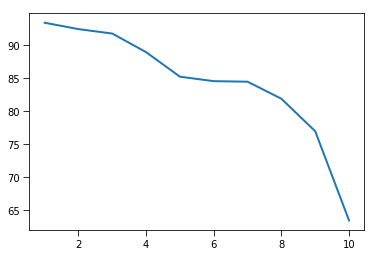

In [131]:
pitches = np.array(['FF', 'FT','SI', 'FC','FS','CH' , 'SL', 'KC','CU',  'EP' ])
totvel = np.zeros(pitches.size)
numvel = np.zeros(pitches.size)

year = '2019'

for indx in range(0,99):
    #print(indx)
    plr = check_players[indx]
    data = []
    #for pitch in pitches[(-1.*pitches_sorted).argsort()]:
    for ipitch,pitch in enumerate(pitches):
        speeds = np.array(BPDict[year][plr]['release_speed'])
        ptypes = BPDict[year][plr]['pitch_type']
        agreed = np.where(ptypes == pitch)[0]
        totvel[ipitch] += np.nansum(speeds[agreed])
        numvel[ipitch] += len(agreed)


plt.plot(np.cumsum(np.ones(pitches.size)),totvel/numvel)


In [134]:
check_players = ['Shane Bieber','Jose Berrios','Zack Greinke','Gerrit Cole','James Paxton']

plr = check_players[3] # select Berrios


# here's everything we have access to now!
BPDict[year][plr].keys()

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [135]:
starts = np.unique(BPDict[year][plr]['game_date'])
pitches = np.unique(BPDict[year][plr]['pitch_type'].astype('str'))
print(pitches)
#print(BPDict[plr]['pitch_type'])
pitches = pitches[pitches!='nan']
print(pitches)


['CH' 'FF' 'KC' 'SL']
['CH' 'FF' 'KC' 'SL']


In [136]:

# plotting elements
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import matplotlib as mpl
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
cmap = cm.RdBu_r




['CH', 'FF', 'FT', 'KC', 'SL', 'nan', 'CH', 'CU', 'FF', 'FT', 'CH', 'CU', 'EP', 'FC', 'FF', 'FS', 'FT', 'SL', 'CH', 'FF', 'FT', 'KC', 'SL', 'nan', 'CH', 'FC', 'FF', 'KC', 'nan']
['CH' 'CU' 'EP' 'FC' 'FF' 'FS' 'FT' 'KC' 'SL']


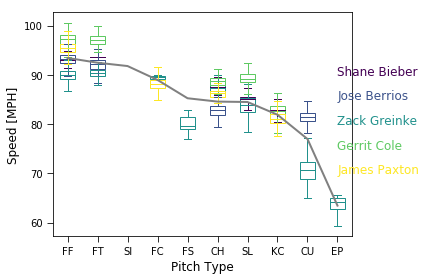

In [141]:
year = '2019'
fig1, ax1 = plt.subplots()


def draw_plot(ax,data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True, showfliers=False,zorder=-10)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color,zorder=-10)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color,zorder=-11)  
        


allpitches = []
for indx in [0,1,2,3,4]:
    plr = check_players[indx]
    for d in np.unique(BPDict[year][plr]['pitch_type'].astype('str')):
        allpitches.append(d)#[d for d in np.unique(BPDict[plr]['pitch_type'].astype('str'))])
    
print(allpitches)
pitches = np.unique(allpitches)
pitches = pitches[pitches!='nan']
print(pitches)

colornum = ['red','blue','green','orange','yellow']
colornum = cm.viridis([0.,0.25,0.5,0.75,1.0])


for indx in [0,1,2,3,4]:
    plr = check_players[indx]
    data = []

    pitches_sorted = np.zeros(pitches.size)
    for ipitch,pitch in enumerate(pitches):
        speeds = np.array(BPDict[year][plr]['release_speed'])
        ptypes = BPDict[year][plr]['pitch_type']
        agreed = np.where(ptypes == pitch)[0]
        pitches_sorted[ipitch] = np.nanmean(speeds[agreed])

pitches = np.array(['FF', 'FT','SI', 'FC','FS', 'CH' , 'SL','KC','CU',  'EP' ])


for indx in [0,1,2,3,4]:
    plr = check_players[indx]
    data = []
    #for pitch in pitches[(-1.*pitches_sorted).argsort()]:
    for pitch in pitches:
        speeds = np.array(BPDict[year][plr]['release_speed'])
        ptypes = BPDict[year][plr]['pitch_type']
        agreed = np.where(ptypes == pitch)[0]
        data.append(speeds[agreed])


    draw_plot(ax1,data, colornum[indx], 'white')
    ax1.text(pitches.size,90-5*indx,plr,color=colornum[indx],size=12)

    
ax1.plot(np.cumsum(np.ones(pitches.size)),totvel/numvel,color='grey')


ax1.set_xticklabels(pitches[(-1.*pitches_sorted).argsort()])
ax1.set_xticklabels(pitches)

ax1.set_ylabel('Speed [MPH]',size=12)
ax1.set_xlabel('Pitch Type',size=12)

plt.tight_layout()
plt.savefig('/Users/mpetersen/Downloads/whiskerexample.png')

['CH' 'CS' 'CU' 'FF' 'SI' 'SL']
FF
FT
SI
FC
CH
SL
FS
KC
CU
EP


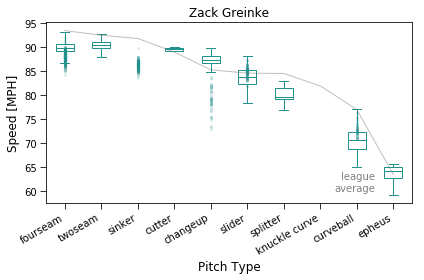

In [149]:

fig1, ax1 = plt.subplots()


colornum = ['red','blue','green','orange','yellow']
colornum = cm.viridis([0.,0.25,0.5,0.75,1.0])


pitches = np.array(['FF', 'FT','SI', 'FC','CH' , 'SL','FS', 'KC','CU',  'EP' ])
pitchesd = np.array(['fourseam', 'twoseam','sinker', 'cutter','changeup' ,\
                    'slider','splitter', 'knuckle curve','curveball',  'epheus' ])


year = '2019'
for indx in [2]:
    plr = check_players[indx]
    data = []
    #for pitch in pitches[(-1.*pitches_sorted).argsort()]:
    for pitch in pitches:
        speeds = np.array(BPDict[year][plr]['release_speed'])
        ptypes = BPDict[year][plr]['pitch_type']
        agreed = np.where(ptypes == pitch)[0]
        data.append(speeds[agreed])


    draw_plot(ax1,data, colornum[indx], 'white')
    #ax1.text(pitches.size,90-1*indx,plr,color=colornum[indx],size=12)

year = '2020'
for indx in [2]:
    plr = check_players[indx]
    print(np.unique(BPDict[year][plr]['pitch_type'].astype('str')))
    data = []
    #for pitch in pitches[(-1.*pitches_sorted).argsort()]:
    for ipitch,pitch in enumerate(pitches):
        print(pitch)
        speeds = np.array(BPDict[year][plr]['release_speed'])
        ptypes = BPDict[year][plr]['pitch_type']
        agreed = np.where(ptypes == pitch)[0]
        #print(ipitch,speeds[agreed])
        #print(ipitch*np.ones(agreed.size))
        ax1.scatter((ipitch+1)*np.ones(agreed.size),speeds[agreed],color=colornum[indx],s=5.,alpha=0.1)


    #draw_plot(ax1,data, colornum[indx], 'white')
    #ax1.text(pitches.size,90-5*indx,plr,color=colornum[indx],size=12)

       
ax1.plot(np.cumsum(np.ones(pitches.size)),totvel/numvel,color='grey',lw=1.,alpha=0.5)
ax1.text(9.5,60.,'league\naverage',size=10,color='grey',ha='right')

ax1.set_title('Zack Greinke',size=12)
ax1.set_xticklabels(pitchesd,rotation=30,ha='right')

ax1.set_ylabel('Speed [MPH]',size=12)
ax1.set_xlabel('Pitch Type',size=12)

plt.tight_layout()
plt.savefig('/Users/mpetersen/Downloads/Greinke_whiskerexample.png')

['2019-03-29' '2019-04-03' '2019-04-09' '2019-04-14' '2019-04-20'
 '2019-04-27' '2019-05-02' '2019-05-08' '2019-05-14' '2019-05-19'
 '2019-05-25' '2019-05-30' '2019-06-05' '2019-06-10' '2019-06-15'
 '2019-06-20' '2019-06-26' '2019-07-02' '2019-07-07' '2019-07-13'
 '2019-07-18' '2019-07-24' '2019-07-30' '2019-08-05' '2019-08-10'
 '2019-08-16' '2019-08-21' '2019-08-27' '2019-09-01' '2019-09-07'
 '2019-09-13' '2019-09-20' '2019-09-25']


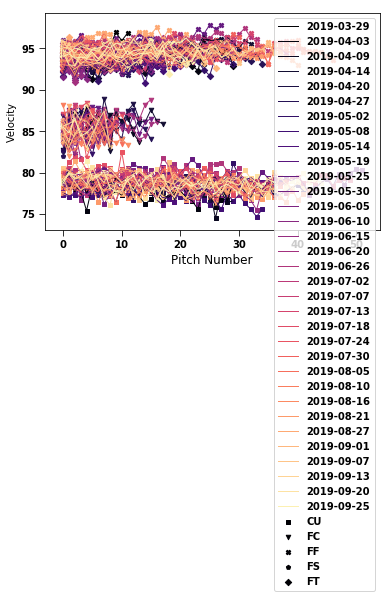

In [27]:
starts = np.unique(BPDict[plr]['game_date'])
pitches = np.unique(BPDict[plr]['pitch_type'].astype('str'))
pitches = pitches[pitches!='nan']

markers = ['s','v','X','p','D','o']
print(starts)

for istart,start in enumerate(starts):
    which_pitches = np.where(BPDict[plr]['game_date']==start)[0]
    for ipitch,pitch in enumerate(pitches):
        speeds = np.array(BPDict[plr]['release_speed'][which_pitches])
        ptypes = BPDict[plr]['pitch_type'][which_pitches]
        agreed = np.where(ptypes == pitch)[0]
        if ipitch==0:
            plt.plot(np.arange(0,agreed.size,1),speeds[agreed],lw=1.0,color=cm.magma(istart/len(starts),1.),label=start)
        else:
            plt.plot(np.arange(0,agreed.size,1),speeds[agreed],lw=1.0,color=cm.magma(istart/len(starts),1.))


        if istart==0:
            plt.scatter(np.arange(0,agreed.size,1),speeds[agreed],marker=markers[ipitch],s=20.,color=cm.magma(istart/len(starts),1.),label=pitch)
        else:
            plt.scatter(np.arange(0,agreed.size,1),speeds[agreed],marker=markers[ipitch],s=20.,color=cm.magma(istart/len(starts),1.))



plt.legend()
plt.xlabel('Pitch Number',size=12)
plt.ylabel('Velocity')
plt.tight_layout()

plt.savefig('figures/'+plr.replace(" ","")+year+'.png',dpi=300)




[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
['2019-03-29' '2019-04-03' '2019-04-09' '2019-04-14' '2019-04-20'
 '2019-04-27' '2019-05-02' '2019-05-08' '2019-05-14' '2019-05-19'
 '2019-05-25' '2019-05-30' '2019-06-05' '2019-06-10' '2019-06-15'
 '2019-06-20' '2019-06-26' '2019-07-02' '2019-07-07' '2019-07-13'
 '2019-07-18' '2019-07-24' '2019-07-30' '2019-08-05' '2019-08-10'
 '2019-08-16' '2019-08-21' '2019-08-27' '2019-09-01' '2019-09-07'
 '2019-09-13' '2019-09-20' '2019-09-25']


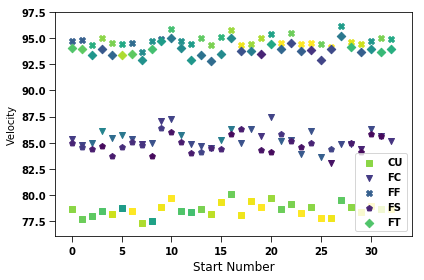

In [28]:
starts = np.unique(BPDict[plr]['game_date'])
pitches = np.unique(BPDict[plr]['pitch_type'].astype('str'))
pitches = pitches[pitches!='nan']
datecode = np.arange(0,starts.size,1)
print(datecode)

# color the start by number of pitches

markers = ['s','v','X','p','D','o']
print(starts)

for istart,start in enumerate(starts):
    which_pitches = np.where(BPDict[plr]['game_date']==start)[0]
    for ipitch,pitch in enumerate(pitches):
        speeds = np.array(BPDict[plr]['release_speed'][which_pitches])
        ptypes = BPDict[plr]['pitch_type'][which_pitches]
        agreed = np.where(ptypes == pitch)[0]
        # bin 'em up
        if istart==0:
            plt.scatter(datecode[istart],np.nanmedian(speeds[agreed]),\
                    color=cm.viridis(agreed.size/40.,1.),\
                   marker=markers[ipitch],label=pitch)
        else:
            plt.scatter(datecode[istart],np.nanmedian(speeds[agreed]),\
                    color=cm.viridis(agreed.size/40.,1.),\
                   marker=markers[ipitch])
        


plt.legend()
plt.xlabel('Start Number',size=12)
plt.ylabel('Velocity')
plt.tight_layout()

plt.savefig('figures/'+plr.replace(" ","")+year+'.png',dpi=300)





In [78]:
list(np.arange(0,101,5))

[0,
 5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100]

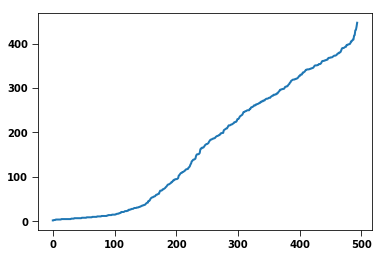

In [57]:
#print(dvals.values)
plt.plot(dvals[dvals.argsort()])

552
['double' 'double_play' 'field_error' 'field_out' 'fielders_choice'
 'fielders_choice_out' 'force_out' 'grounded_into_double_play' 'home_run'
 'sac_fly' 'single' 'triple']


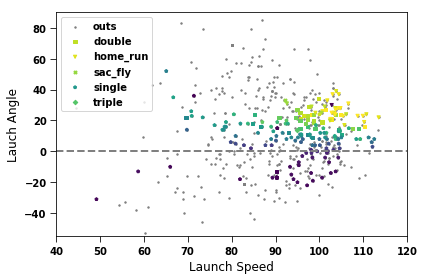

In [72]:

# check the outcomes

w = np.where(np.isfinite(BPDict[plr]['launch_speed']))[0]
print(w.size)

#print(BPDict[plr]['events'][w])

outcomes = np.unique(BPDict[plr]['events'][w])
print(outcomes)

dvals = np.array(BPDict[plr]['hit_distance_sc'].values)

markers = ['s','v','X','p','D','o','^','P','*']

plt.scatter(BPDict[plr]['launch_speed'][w],\
                BPDict[plr]['launch_angle'][w],\
                color='grey',s=2.,marker='o',label='outs')

# only allow these unique outcomes
outcomes = ['double', 'home_run', 'sac_fly', 'single', 'triple']

for indx,outcome in enumerate(outcomes):
    v = np.where(BPDict[plr]['events'].values==outcome)[0]
    #print(v)
    #print(BPDict[plr]['events'][v].values)
    #print(outcome,v)
    try:
        plt.scatter(BPDict[plr]['launch_speed'][w][v],\
                BPDict[plr]['launch_angle'][w][v],\
                color=cm.viridis(dvals[v]/400.,1.),s=10.,marker=markers[indx],label=outcome)
    except:
        pass

plt.legend()
plt.plot([40.,120.],[0,0],color='grey',linestyle='dashed')

plt.axis([40.,120.,-55,90])
plt.ylabel('Lauch Angle',size=12)
plt.xlabel('Launch Speed',size=12)

plt.tight_layout()

plt.savefig('figures/'+plr.replace(" ","")+'_launch.png',dpi=300)




['CH' 'FC' 'FF' 'KC' 'SL']


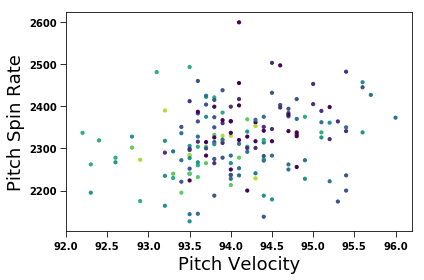

In [19]:

# check a particular pitch

print(np.unique(BPDict[plr]['pitch_type']))
pitchtype = 'FF'

pitch_velocity = BPDict[plr]['release_speed'][BPDict[plr]['pitch_type']==pitchtype]
pitch_spin = BPDict[plr]['release_spin_rate'][BPDict[plr]['pitch_type']==pitchtype]
pitch_inning = np.array(BPDict[plr]['inning'][BPDict[plr]['pitch_type']==pitchtype]).astype('float')


plt.scatter(pitch_velocity,pitch_spin,color=cm.viridis((pitch_inning-1)/8.,1.),s=10.)

plt.xlabel('Pitch Velocity',size=18)
plt.ylabel('Pitch Spin Rate',size=18)
plt.tight_layout()

